In [10]:
using ITensors
using Plots

In [29]:
# Number of qubits per dimension
N = 7  # You can change this to N = 7 if resources permit
num_points = 2^N
    
    # Define the x and y grids
x_vals = range(0, π, length=num_points)
y_vals = range(0, 2π, length=num_points)
 # Define the function
f(x, y) = sin(x + y) * cos(x * y)

# Compute the function values and store in a matrix F
F = [f(x, y) for x in x_vals, y in y_vals]
# Flatten the 2D function values into a 1D vector
F_vec = reshape(F, num_points^2)

# Create site indices for 2N qubits
sites = siteinds("Qubit", 2*N)

# Create a tensor from the function vector
# Reshape the vector into a tensor with 2N indices, each of dimension 2
dims = fill(2, 2*N)
F_tensor = reshape(F_vec, dims...)

# Create an ITensor with the site indices
T = ITensor(F_tensor, sites...)







ITensor ord=14 (dim=2|id=487|"Qubit,Site,n=1") (dim=2|id=543|"Qubit,Site,n=2") (dim=2|id=856|"Qubit,Site,n=3") (dim=2|id=623|"Qubit,Site,n=4") (dim=2|id=101|"Qubit,Site,n=5") (dim=2|id=70|"Qubit,Site,n=6") (dim=2|id=651|"Qubit,Site,n=7") (dim=2|id=882|"Qubit,Site,n=8") (dim=2|id=415|"Qubit,Site,n=9") (dim=2|id=226|"Qubit,Site,n=10") (dim=2|id=664|"Qubit,Site,n=11") (dim=2|id=368|"Qubit,Site,n=12") (dim=2|id=221|"Qubit,Site,n=13") (dim=2|id=81|"Qubit,Site,n=14")
NDTensors.Dense{Float64, Vector{Float64}}

In [30]:
# Decompose the tensor into an MPS
psi = MPS(T, sites)


Contraction resulted in ITensor with 14 indices, which is greater
            than or equal to the ITensor order warning threshold 14.
            You can modify the threshold with macros like `@set_warn_order N`,
            `@reset_warn_order`, and `@disable_warn_order` or functions like
            `ITensors.set_warn_order(N::Int)`, `ITensors.reset_warn_order()`, and
            `ITensors.disable_warn_order()`.

Stacktrace:
  [1] _contract(A::ITensor, B::ITensor)
    @ ITensors ~/.julia/packages/ITensors/70qev/src/tensor_operations/tensor_algebra.jl:20
  [2] contract(A::ITensor, B::ITensor)
    @ ITensors ~/.julia/packages/ITensors/70qev/src/tensor_operations/tensor_algebra.jl:74
  [3] *
    @ ~/.julia/packages/ITensors/70qev/src/tensor_operations/tensor_algebra.jl:61 [inlined]
  [4] qx(qx::typeof(qr), A::ITensor, Linds::Vector{Index{Int64}}, Rinds::Vector{Index{Int64}}; tags::String, positive::Bool)
    @ ITensors ~/.julia/packages/ITensors/70qev/src/tensor_operations/matrix_decomp

MPS
[1] ((dim=2|id=487|"Qubit,Site,n=1"), (dim=2|id=980|"Link,n=1"))
[2] ((dim=2|id=980|"Link,n=1"), (dim=2|id=543|"Qubit,Site,n=2"), (dim=4|id=128|"Link,n=2"))
[3] ((dim=4|id=128|"Link,n=2"), (dim=2|id=856|"Qubit,Site,n=3"), (dim=8|id=101|"Link,n=3"))
[4] ((dim=8|id=101|"Link,n=3"), (dim=2|id=623|"Qubit,Site,n=4"), (dim=16|id=407|"Link,n=4"))
[5] ((dim=16|id=407|"Link,n=4"), (dim=2|id=101|"Qubit,Site,n=5"), (dim=32|id=530|"Link,n=5"))
[6] ((dim=32|id=530|"Link,n=5"), (dim=2|id=70|"Qubit,Site,n=6"), (dim=64|id=455|"Link,n=6"))
[7] ((dim=64|id=455|"Link,n=6"), (dim=2|id=651|"Qubit,Site,n=7"), (dim=128|id=141|"Link,n=7"))
[8] ((dim=128|id=141|"Link,n=7"), (dim=2|id=882|"Qubit,Site,n=8"), (dim=64|id=11|"Link,n=8"))
[9] ((dim=64|id=11|"Link,n=8"), (dim=2|id=415|"Qubit,Site,n=9"), (dim=32|id=690|"Link,n=9"))
[10] ((dim=32|id=690|"Link,n=9"), (dim=2|id=226|"Qubit,Site,n=10"), (dim=16|id=300|"Link,n=10"))
[11] ((dim=16|id=300|"Link,n=10"), (dim=2|id=664|"Qubit,Site,n=11"), (dim=8|id=578|"Link

In [31]:
# Extract bond dimensions of the MPS
bond_dims = [dim(linkind(psi, n)) for n in 1:length(psi)-1]
println("Bond dimensions without truncation: ", bond_dims)

# The maximal bond dimension is:
max_bond_dim = maximum(bond_dims)
println("Maximal bond dimension without truncation: ", max_bond_dim)


Bond dimensions without truncation: [2, 4, 8, 16, 32, 64, 128, 64, 32, 16, 8, 4, 2]
Maximal bond dimension without truncation: 128


In [32]:
# Desired bond dimension
chi = 3

# Truncate the MPS to the desired bond dimension
psi_trunc = truncate(psi; maxdim=chi)


MPS
[1] ((dim=2|id=487|"Qubit,Site,n=1"), (dim=2|id=848|"Link,n=1"))
[2] ((dim=2|id=543|"Qubit,Site,n=2"), (dim=3|id=357|"Link,n=2"), (dim=2|id=848|"Link,n=1"))
[3] ((dim=2|id=856|"Qubit,Site,n=3"), (dim=3|id=127|"Link,n=3"), (dim=3|id=357|"Link,n=2"))
[4] ((dim=2|id=623|"Qubit,Site,n=4"), (dim=3|id=33|"Link,n=4"), (dim=3|id=127|"Link,n=3"))
[5] ((dim=2|id=101|"Qubit,Site,n=5"), (dim=3|id=285|"Link,n=5"), (dim=3|id=33|"Link,n=4"))
[6] ((dim=2|id=70|"Qubit,Site,n=6"), (dim=3|id=352|"Link,n=6"), (dim=3|id=285|"Link,n=5"))
[7] ((dim=2|id=651|"Qubit,Site,n=7"), (dim=3|id=782|"Link,n=7"), (dim=3|id=352|"Link,n=6"))
[8] ((dim=2|id=882|"Qubit,Site,n=8"), (dim=3|id=298|"Link,n=8"), (dim=3|id=782|"Link,n=7"))
[9] ((dim=2|id=415|"Qubit,Site,n=9"), (dim=3|id=106|"Link,n=9"), (dim=3|id=298|"Link,n=8"))
[10] ((dim=2|id=226|"Qubit,Site,n=10"), (dim=3|id=938|"Link,n=10"), (dim=3|id=106|"Link,n=9"))
[11] ((dim=2|id=664|"Qubit,Site,n=11"), (dim=3|id=977|"Link,n=11"), (dim=3|id=938|"Link,n=10"))
[12] ((

In [33]:
# Reconstruct the approximate function values
F_approx_vec = Float64[]

# Total number of sites
N_sites = 2*N

# Function to convert integer to binary vector
function int_to_binvec(n::Int, num_bits::Int)
    binvec = zeros(Int, num_bits)
    for k in 1:num_bits
        binvec[k] = (n >> (num_bits - k)) & 1
    end
    return binvec
end

# Loop over all possible states
for idx in 1:length(F_vec)
    # Convert idx - 1 to binary representation
    bin_state = int_to_binvec(idx - 1, N_sites)
    # Convert binary state to physical indices ("Up" or "Dn")
    state = [(bin_state[n] == 0) ? "Up" : "Dn" for n in 1:N_sites]
    # Compute the amplitude ⟨state|psi_trunc⟩
    amplitude = inner(psi_trunc, state)
    push!(F_approx_vec, amplitude)
end

# Reshape the approximate function vector back into a matrix
F_approx = reshape(F_approx_vec, num_points, num_points)


LoadError: MethodError: no method matching inner(::MPS, ::Vector{String})

[0mClosest candidates are:
[0m  inner(::MPS, [91m::MPO[39m, [91m::MPS[39m; kwargs...)
[0m[90m   @[39m [36mITensors[39m [90m~/.julia/packages/ITensors/70qev/src/lib/ITensorMPS/src/[39m[90m[4mmpo.jl:449[24m[39m
[0m  inner(::MPS, [91m::ITensors.LazyApply.Applied{typeof(product), Tuple{MPO, MPS}}[39m)
[0m[90m   @[39m [36mITensors[39m [90m~/.julia/packages/ITensors/70qev/src/lib/ITensorMPS/src/[39m[90m[4mmpo.jl:451[24m[39m
[0m  inner(::MPST, [91m::MPST[39m; kwargs...) where MPST<:AbstractMPS
[0m[90m   @[39m [36mITensors[39m [90m~/.julia/packages/ITensors/70qev/src/lib/ITensorMPS/src/[39m[90m[4mabstractmps.jl:1199[24m[39m


using ITensors          # For tensor computations
using Plots             # For plotting
using LinearAlgebra     # For linear algebra operations
using HDF5              # For reading HDF5 files


In [36]:
using ITensors          # For tensor computations
using Plots             # For plotting
using LinearAlgebra     # For linear algebra operations
using HDF5              # For reading HDF5 files


In [35]:
import Pkg; Pkg.add("HDF5")

   Resolving package versions...
   Installed MPIPreferences ──── v0.1.11
   Installed libaec_jll ──────── v1.1.2+0
   Installed Hwloc_jll ───────── v2.11.2+0
   Installed MicrosoftMPI_jll ── v10.1.4+2
   Installed MPICH_jll ───────── v4.2.3+0
   Installed OpenMPI_jll ─────── v4.1.6+0
   Installed HDF5_jll ────────── v1.14.3+3
   Installed HDF5 ────────────── v0.17.2
   Installed MPItrampoline_jll ─ v5.5.0+0
    Updating `~/.julia/environments/v1.10/Project.toml`
  [f67ccb44] + HDF5 v0.17.2
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [f67ccb44] + HDF5 v0.17.2
  [3da0fdf6] + MPIPreferences v0.1.11
  [0234f1f7] + HDF5_jll v1.14.3+3
  [e33a78d0] + Hwloc_jll v2.11.2+0
  [7cb0a576] + MPICH_jll v4.2.3+0
  [f1f71cc9] + MPItrampoline_jll v5.5.0+0
  [9237b28f] + MicrosoftMPI_jll v10.1.4+2
⌅ [fe0851c0] + OpenMPI_jll v4.1.6+0
  [477f73a3] + libaec_jll v1.1.2+0
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading.

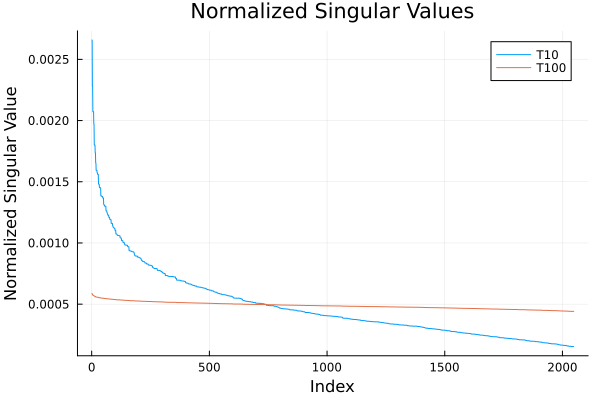

In [37]:
# Load the matrices from the HDF5 file
file = h5open("ThermalMatrices.h5", "r")
T10 = read(file, "T10")
T100 = read(file, "T100")
close(file)

# Calculate the SVD
U10, S10, V10 = svd(T10)
U100, S100, V100 = svd(T100)

# Normalize the singular values
S10_norm = S10 / sum(S10)
S100_norm = S100 / sum(S100)

# Plot the normalized singular values
plot(1:length(S10_norm), S10_norm, label="T10", xlabel="Index", ylabel="Normalized Singular Value", title="Normalized Singular Values")
plot!(1:length(S100_norm), S100_norm, label="T100")


In [38]:
# Function to determine the number of singular values to keep
function num_singular_values_to_keep(S, error_threshold)
    cumulative_sum = cumsum(S)
    total_sum = sum(S)
    for i in 1:length(S)
        if cumulative_sum[i] / total_sum >= (1 - error_threshold)
            return i
        end
    end
    return length(S)
end

# Determine the number of singular values to keep for 1% truncation error
error_threshold = 0.01
num_sv_T10 = num_singular_values_to_keep(S10, error_threshold)
num_sv_T100 = num_singular_values_to_keep(S100, error_threshold)

println("Number of singular values to keep for T10: ", num_sv_T10)
println("Number of singular values to keep for T100: ", num_sv_T100)

# Truncate the matrices
T10_truncated = U10[:, 1:num_sv_T10] * Diagonal(S10[1:num_sv_T10]) * V10[:, 1:num_sv_T10]'
T100_truncated = U100[:, 1:num_sv_T100] * Diagonal(S100[1:num_sv_T100]) * V100[:, 1:num_sv_T100]'


Number of singular values to keep for T10: 1986
Number of singular values to keep for T100: 2026


2048×2048 Matrix{Float64}:
 0.0   0.0           0.0          …   0.0           0.0          0.0
 0.0   0.000331335  -0.000121532      3.23017e-21   1.32974e-20  0.0
 0.0  -0.000121532   0.000352756     -5.43184e-21  -3.02565e-21  0.0
 0.0   1.09265e-18   1.21063e-18      2.56707e-19   2.64359e-19  0.0
 0.0  -0.000100111  -0.000104519     -1.08977e-20  -1.56388e-20  0.0
 0.0   1.96807e-18   1.89866e-18  …   1.04795e-19   1.23296e-19  0.0
 0.0   2.61656e-18   2.57502e-18      1.6775e-19    2.39065e-19  0.0
 0.0   2.62261e-18   2.30075e-18     -5.20897e-19  -5.99918e-19  0.0
 0.0  -8.30974e-5   -7.9522e-5       -2.7369e-21    2.54525e-21  0.0
 0.0   2.05401e-18   1.88149e-18     -5.45241e-20  -5.58565e-20  0.0
 0.0   3.00422e-18   2.83899e-18  …  -5.19901e-20  -2.60557e-20  0.0
 0.0   2.38921e-18   2.02944e-18     -3.72555e-19  -3.43156e-19  0.0
 0.0   1.41906e-18   1.40024e-18     -2.25132e-19  -2.4556e-19   0.0
 ⋮                                ⋱   ⋮                          
 0.0  -4.3

In [39]:
# Calculate eigenvalues
eigvals_T10 = eigen(T10).values
eigvals_T10_truncated = eigen(T10_truncated).values

# Plot the eigenvalues
plot(1:length(eigvals_T10), sort(eigvals_T10, rev=true), label="T10", xlabel="Index", ylabel="Eigenvalue", title="Eigenvalues Comparison")
plot!(1:length(eigvals_T10_truncated), sort(eigvals_T10_truncated, rev=true), label="T10 Truncated")


LoadError: MethodError: no method matching isless(::ComplexF64, ::ComplexF64)

[0mClosest candidates are:
[0m  isless([91m::Missing[39m, ::Any)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:87[24m[39m
[0m  isless(::Any, [91m::Missing[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:88[24m[39m


In [40]:
# Function to calculate von Neumann entropy
function von_neumann_entropy(matrix)
    eigvals = eigen(matrix).values
    entropy = -sum(eigvals .* log.(eigvals))
    return entropy
end

# Calculate the von Neumann entropy
entropy_T10 = von_neumann_entropy(T10)
entropy_T100 = von_neumann_entropy(T100)

println("Von Neumann entropy of T10: ", entropy_T10)
println("Von Neumann entropy of T100: ", entropy_T100)


Von Neumann entropy of T10: 7.459116059789881
Von Neumann entropy of T100: 7.62309934232943


In [41]:
# Specify the file path
file_path = "ThermalMatrices.h5"

# Open the HDF5 file and read the matrices
h5open(file_path, "r") do file
    # Read the datasets into arrays
    T10 = read(file["T10"])
    T100 = read(file["T100"])
end


2048×2048 Matrix{Float64}:
 0.000441149   0.0           0.0          …   0.0          0.0
 0.0           0.000450151  -9.09304e-6       4.2088e-41   0.0
 0.0          -9.09304e-6    0.000459335     -1.13847e-41  0.0
 0.0           4.63725e-21  -1.18953e-20     -9.32442e-40  0.0
 0.0           9.12304e-8   -9.18488e-6      -6.41873e-41  0.0
 0.0          -1.07062e-20   1.61198e-20  …  -8.02396e-40  0.0
 0.0           8.72086e-22  -1.88149e-20     -2.36789e-40  0.0
 0.0          -2.98296e-21   1.03586e-21      1.12362e-39  0.0
 0.0          -6.09203e-10   9.18427e-8      -6.14024e-41  0.0
 0.0           1.79582e-20  -2.29726e-20     -2.4914e-40   0.0
 0.0          -1.31356e-20   2.61366e-20  …  -5.74969e-40  0.0
 0.0           9.83196e-21  -2.16977e-20     -2.91225e-40  0.0
 0.0           7.69069e-21   1.22401e-20     -5.57326e-40  0.0
 ⋮                                        ⋱                
 0.0          -3.73396e-21   2.55551e-21      2.90727e-21  0.0
 0.0          -5.47609e-21   5.

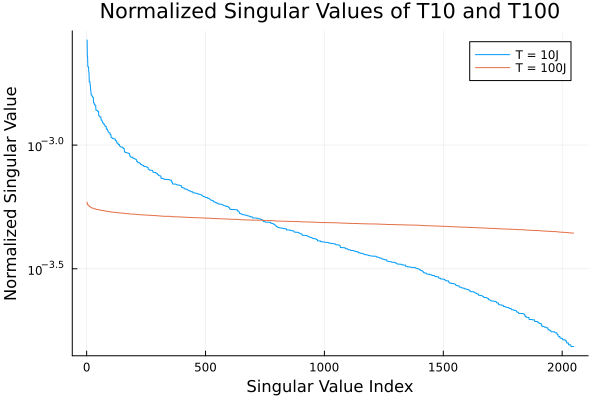

In [42]:
# Perform SVD on T10
U_T10, S_T10, V_T10 = svd(T10)

# Perform SVD on T100
U_T100, S_T100, V_T100 = svd(T100)
# Normalize the singular values for T10
S_T10_normalized = S_T10 ./ sum(S_T10)

# Normalize the singular values for T100
S_T100_normalized = S_T100 ./ sum(S_T100)
# Create a plot of the normalized singular values
plot(
    1:length(S_T10_normalized), S_T10_normalized,
    label = "T = 10J",
    xlabel = "Singular Value Index",
    ylabel = "Normalized Singular Value",
    yscale = :log10,
    title = "Normalized Singular Values of T10 and T100"
)

# Add the singular values of T100 to the same plot
plot!(
    1:length(S_T100_normalized), S_T100_normalized,
    label = "T = 100J"
)

# Display the plot
display(current())


In [43]:
# Function to compute the truncation error for a given number of singular values
function truncation_error(S, r)
    total_norm = sum(S .^ 2)
    discarded_norm = sum(S[r+1:end] .^ 2)
    return discarded_norm / total_norm
end


truncation_error (generic function with 1 method)

In [44]:
# For T10
r_T10 = 1
while truncation_error(S_T10, r_T10) > 0.01  # 1% error
    r_T10 += 1
end

println("Number of singular values to keep for T10: ", r_T10)

# For T100
r_T100 = 1
while truncation_error(S_T100, r_T100) > 0.01  # 1% error
    r_T100 += 1
end

println("Number of singular values to keep for T100: ", r_T100)


Number of singular values to keep for T10: 1838
Number of singular values to keep for T100: 2023


In [45]:
# Compress T10
U_T10_compressed = U_T10[:, 1:r_T10]
S_T10_compressed = Diagonal(S_T10[1:r_T10])
V_T10_compressed = V_T10[:, 1:r_T10]

T10_compressed = U_T10_compressed * S_T10_compressed * V_T10_compressed'

# Compress T100
U_T100_compressed = U_T100[:, 1:r_T100]
S_T100_compressed = Diagonal(S_T100[1:r_T100])
V_T100_compressed = V_T100[:, 1:r_T100]

T100_compressed = U_T100_compressed * S_T100_compressed * V_T100_compressed'


2048×2048 Matrix{Float64}:
 0.0   0.0           0.0          …   0.0           0.0          0.0
 0.0   0.000331335  -0.000121532      3.23017e-21   1.32974e-20  0.0
 0.0  -0.000121532   0.000352756     -5.43184e-21  -3.02565e-21  0.0
 0.0  -6.57186e-18  -5.11375e-18      2.36829e-19   2.37747e-19  0.0
 0.0  -0.000100111  -0.000104519     -1.08977e-20  -1.56388e-20  0.0
 0.0  -4.40251e-18  -3.358e-18    …   8.82843e-20   1.01299e-19  0.0
 0.0  -3.11582e-18  -2.15506e-18      1.52847e-19   2.19187e-19  0.0
 0.0  -1.8073e-19   -4.66705e-20     -1.74909e-19  -1.86066e-19  0.0
 0.0  -8.30974e-5   -7.9522e-5       -2.7369e-21    2.54525e-21  0.0
 0.0  -2.5852e-18   -1.94658e-18     -6.65814e-20  -7.20033e-20  0.0
 0.0  -1.122e-18    -5.65849e-19  …  -6.26056e-20  -4.03474e-20  0.0
 0.0   5.92254e-20   7.82743e-20     -8.49679e-20   8.11722e-22  0.0
 0.0  -1.72663e-18  -1.1954e-18      -2.33325e-19  -2.56266e-19  0.0
 ⋮                                ⋱   ⋮                          
 0.0  -2.6

In [46]:
# Compute eigenvalues of T10
eigvals_T10 = eigvals(T10)

# Compute eigenvalues of the truncated T10
eigvals_T10_compressed = eigvals(T10_compressed)


2048-element Vector{ComplexF64}:
   -9.29053451209163e-19 + 0.0im
  -8.404619824449878e-19 + 0.0im
   -7.61640387097437e-19 + 0.0im
  -5.313633946818977e-19 + 0.0im
  -5.301355608827084e-19 + 0.0im
  -5.285291930479151e-19 - 1.3980928192139973e-19im
  -5.285291930479151e-19 + 1.3980928192139973e-19im
  -4.526864238385027e-19 - 2.9800341151924245e-20im
  -4.526864238385027e-19 + 2.9800341151924245e-20im
 -4.4040672445131455e-19 + 0.0im
 -3.6919245655492256e-19 + 0.0im
 -3.3366093238574595e-19 + 0.0im
 -3.2949227237945857e-19 - 1.8212845910776184e-20im
                         ⋮
    0.001800088179243708 + 0.0im
    0.001800088179243731 + 0.0im
    0.001970656227726659 + 0.0im
   0.0019706562277266807 + 0.0im
    0.002072244938282379 + 0.0im
   0.0020722449382823823 + 0.0im
    0.002072244938282395 + 0.0im
    0.002072244938282413 + 0.0im
   0.0022816001676922303 + 0.0im
    0.002281600167692267 + 0.0im
   0.0026575127251187362 + 0.0im
    0.002657512725118764 + 0.0im

In [47]:
# Normalize the eigenvalues
eigvals_T10_normalized = eigvals_T10 ./ sum(eigvals_T10)
eigvals_T10_compressed_normalized = eigvals_T10_compressed ./ sum(eigvals_T10_compressed)

# Sort the eigenvalues in descending order
eigvals_T10_normalized = sort(eigvals_T10_normalized, rev = true)
eigvals_T10_compressed_normalized = sort(eigvals_T10_compressed_normalized, rev = true)


LoadError: MethodError: no method matching isless(::ComplexF64, ::ComplexF64)

[0mClosest candidates are:
[0m  isless([91m::Missing[39m, ::Any)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:87[24m[39m
[0m  isless(::Any, [91m::Missing[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:88[24m[39m


In [48]:
# Plot the eigenvalues
plot(
    1:length(eigvals_T10_normalized), eigvals_T10_normalized,
    label = "Original T10",
    xlabel = "Eigenvalue Index",
    ylabel = "Normalized Eigenvalue",
    yscale = :log10,
    title = "Comparison of Eigenvalues of T10 and Truncated T10"
)

# Add the eigenvalues of the truncated T10 to the same plot
plot!(
    1:length(eigvals_T10_compressed_normalized), eigvals_T10_compressed_normalized,
    label = "Truncated T10"
)

# Display the plot
display(current())


LoadError: MethodError: no method matching isless(::Float64, ::ComplexF64)

[0mClosest candidates are:
[0m  isless([91m::Missing[39m, ::Any)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:87[24m[39m
[0m  isless(::Any, [91m::Missing[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:88[24m[39m
[0m  isless(::AbstractFloat, [91m::Union{StatsBase.PValue, StatsBase.TestStat}[39m)
[0m[90m   @[39m [35mStatsBase[39m [90m~/.julia/packages/StatsBase/ebrT3/src/[39m[90m[4mstatmodels.jl:100[24m[39m
[0m  ...


In [49]:
# Normalize T10 and T100
T10_normalized = T10 / tr(T10)
T100_normalized = T100 / tr(T100)
# Compute eigenvalues of T10_normalized
eigvals_T10_norm = eigvals(T10_normalized)

# Compute eigenvalues of T100_normalized
eigvals_T100_norm = eigvals(T100_normalized)
# Function to compute von Neumann entropy
function von_neumann_entropy(eigvals)
    # Filter out zero or negative eigenvalues due to numerical errors
    positive_eigvals = eigvals[eigvals .> 1e-12]
    return -sum(positive_eigvals .* log2.(positive_eigvals))
end

# Calculate the entropy for T10
S_T10 = von_neumann_entropy(eigvals_T10_norm)
println("Von Neumann entropy of T10: ", S_T10)

# Calculate the entropy for T100
S_T100 = von_neumann_entropy(eigvals_T100_norm)
println("Von Neumann entropy of T100: ", S_T100)


Von Neumann entropy of T10: 10.761229748874102
Von Neumann entropy of T100: 10.997807617382591


In [56]:
import Pkg; Pkg.add("ProgressMeter")

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [92933f4c] + ProgressMeter v1.10.2
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [57]:
using LinearAlgebra     # For linear algebra operations
using HDF5              # For reading HDF5 files
using ProgressMeter     # For displaying progress bars (optional)

# Load the matrix T10
file_path = "ThermalMatrices.h5"

h5open(file_path, "r") do file
    T10 = read(file["T10"])
end


2048×2048 Matrix{Float64}:
 0.000153286   0.0           0.0          …   0.0          0.0
 0.0           0.000191259  -4.20213e-5       2.62292e-42  0.0
 0.0          -4.20213e-5    0.000237608     -7.20838e-42  0.0
 0.0          -6.25391e-21   3.94633e-22     -1.4759e-40   0.0
 0.0           4.32685e-6   -4.66408e-5      -1.19166e-41  0.0
 0.0           1.36915e-20  -1.06565e-20  …   2.30773e-40  0.0
 0.0           8.54598e-21   1.9115e-21      -1.452e-40    0.0
 0.0          -2.90765e-21  -7.94473e-23     -4.90522e-39  0.0
 0.0          -2.92596e-7    4.6342e-6       -3.04821e-42  0.0
 0.0           5.45744e-21  -1.00762e-21      1.99868e-40  0.0
 0.0          -1.71915e-20   2.30678e-20  …  -4.28863e-42  0.0
 0.0           1.9278e-21   -4.77745e-21     -5.19119e-39  0.0
 0.0           7.94868e-21  -3.50315e-22      1.0163e-40   0.0
 ⋮                                        ⋱                
 0.0          -5.25678e-21  -1.71472e-22      2.34843e-21  0.0
 0.0           1.44931e-21  -3.

In [58]:
function polar_decomposition_iterative(O; tol=1e-6, maxiter=1000)
    # Initialization
    P = copy(O)
    I = Matrix{Float64}(I, size(O, 2), size(O, 2))
    
    # Iterative process
    for k in 1:maxiter
        P_prev = P
        # Update P
        P = (1/2) * P * (3I - P' * P)
        # Check for convergence
        err = norm(P - P_prev, "fro") / norm(P, "fro")
        if err < tol
            println("Converged after $k iterations with error $err")
            break
        end
        if k == maxiter
            println("Reached maximum iterations without full convergence.")
        end
    end
    # Compute H
    H = P' * O
    return P, H
end


polar_decomposition_iterative (generic function with 1 method)

In [60]:
# Apply the iterative polar decomposition to T10
P_iter, H_iter = polar_decomposition_iterative(T10)

LoadError: UndefVarError: `I` not defined

In [53]:
# Load the matrix T10 from the HDF5 file
file = h5open("ThermalMatrices.h5", "r")
T10 = read(file, "T10")
close(file)

# Function to perform the polar decomposition using the iterative algorithm
function polar_decomposition(A; tol=1e-10, max_iter=1000)
    m, n = size(A)
    P = A
    for i in 1:max_iter
        P_old = P
        P = 0.5 * (P + inv(P'))
        if norm(P - P_old, Inf) < tol
            break
        end
    end
    H = P' * A
    return P, H
end

# Apply the polar decomposition to T10
P, H = polar_decomposition(T10)

# Verify the decomposition
println("Norm of difference (T10 - P*H): ", norm(T10 - P*H))


Norm of difference (T10 - P*H): 6.203759850481932e-36


In [55]:
# Perform SVD on T10
U, Σ, V = svd(T10)
SVD_P = U * V'
SVD_H = V * Diagonal(Σ) * V'

# Calculate the Frobenius norm of the differences
norm_P_diff = norm(P - SVD_P)
norm_H_diff = norm(H - SVD_H)

println("Frobenius norm of difference for P: ", norm_P_diff)
println("Frobenius norm of difference for H: ", norm_H_diff)


Frobenius norm of difference for P: 1.4845313502493195e-13
Frobenius norm of difference for H: 8.253160101249298e-17


In [64]:
# Import necessary packages
using LinearAlgebra     # For linear algebra operations
using HDF5              # For reading HDF5 files
using ProgressMeter     # For displaying progress bars (optional)

# (a) Load the matrix T10
file_path = "ThermalMatrices.h5"

h5open(file_path, "r") do file
    T10 = read(file["T10"])
end

# Define the iterative polar decomposition function
function polar_decomposition_iterative(O; tol=1e-6, maxiter=1000)
    # Initialization
    P = copy(O)
    # No need to define I; use I from LinearAlgebra directly

    # Iterative process
    for k in 1:maxiter
        P_prev = P
        # Update P using the identity operator I
        P = (1/2) * P * (3I - P' * P)
        # Check for convergence
        err = norm(P - P_prev) / norm(P)
        if err < tol
            println("Converged after $k iterations with error $err")
            break
        end
        if k == maxiter
            println("Reached maximum iterations without full convergence.")
        end
    end
    # Compute H
    H = P' * O
    return P, H
end

# Apply the iterative algorithm to T10
println("Starting iterative polar decomposition...")
@time P_iter, H_iter = polar_decomposition_iterative(T10)

# Verify the decomposition
O_reconstructed = P_iter * H_iter
reconstruction_error = norm(T10 - O_reconstructed) / norm(T10)
println("Reconstruction error (iterative method): ", reconstruction_error)

# (b) Compute the polar decomposition using SVD
println("Computing SVD-based polar decomposition...")
@time U, Σ, V = svd(T10)

# Compute P and H using SVD
P_svd = U * V'
H_svd = V * Diagonal(Σ) * V'

# Compare P and H from iterative method and SVD
# Compute the differences
P_diff = norm(P_iter - P_svd)
H_diff = norm(H_iter - H_svd)

# Compute the relative differences
P_diff_rel = P_diff / norm(P_svd)
H_diff_rel = H_diff / norm(H_svd)

println("Relative Frobenius norm difference for P: ", P_diff_rel)
println("Relative Frobenius norm difference for H: ", H_diff_rel)

# Optional: You can also plot the singular values to compare
# Plot the singular values from SVD
using Plots

# Singular values from H_iter and H_svd
eigvals_H_iter = eigvals(H_iter)
eigvals_H_svd = eigvals(H_svd)

# Sort and normalize the eigenvalues
eigvals_H_iter_sorted = sort(eigvals_H_iter, rev = true)
eigvals_H_svd_sorted = sort(eigvals_H_svd, rev = true)

# Plot the eigenvalues
plot(
    1:length(eigvals_H_iter_sorted), eigvals_H_iter_sorted,
    label = "H_iter eigenvalues",
    xlabel = "Eigenvalue Index",
    ylabel = "Eigenvalue",
    yscale = :log10,
    title = "Eigenvalues of H from Iterative Method and SVD"
)
plot!(
    1:length(eigvals_H_svd_sorted), eigvals_H_svd_sorted,
    label = "H_svd eigenvalues"
)
display(current())


Starting iterative polar decomposition...
Converged after 26 iterations with error 4.138577751317354e-7
 12.159069 seconds (5.94 k allocations: 3.313 GiB, 3.55% gc time, 0.16% compilation time)
Reconstruction error (iterative method): 1.155378566760996e-12
Computing SVD-based polar decomposition...
  6.622580 seconds (16 allocations: 192.250 MiB)
Relative Frobenius norm difference for P: 2.1681708905772687e-12
Relative Frobenius norm difference for H: 5.776864404967165e-13


LoadError: MethodError: no method matching isless(::ComplexF64, ::ComplexF64)

[0mClosest candidates are:
[0m  isless([91m::Missing[39m, ::Any)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:87[24m[39m
[0m  isless(::Any, [91m::Missing[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:88[24m[39m


Starting iterative polar decomposition...
Converged after 26 iterations with error 4.138577751317354e-7
 10.270284 seconds (5.94 k allocations: 3.313 GiB, 3.51% gc time, 0.32% compilation time)
Reconstruction error (iterative method): 1.155378566760996e-12
Computing SVD-based polar decomposition...
  4.610349 seconds (16 allocations: 192.250 MiB)
Maximum imaginary part of eigvals_H_iter: 0.0
Maximum imaginary part of eigvals_H_svd: 0.0
Relative Frobenius norm difference for P: 2.1681708905772687e-12
Relative Frobenius norm difference for H: 5.776863658021467e-13


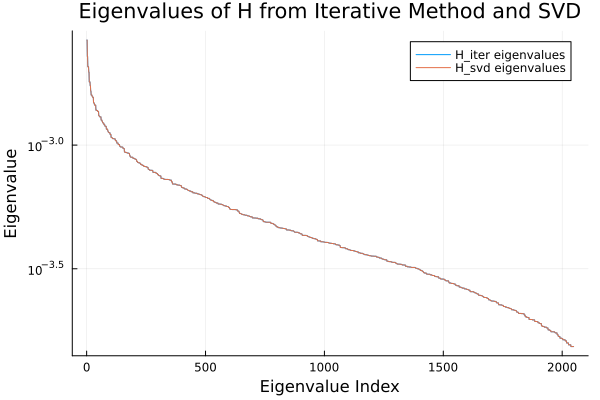

In [65]:
# Import necessary packages
using LinearAlgebra     # For linear algebra operations
using HDF5              # For reading HDF5 files
using ProgressMeter     # For displaying progress bars (optional)
using Plots             # For plotting

# (a) Load the matrix T10
file_path = "ThermalMatrices.h5"

h5open(file_path, "r") do file
    T10 = read(file["T10"])
end

# Define the iterative polar decomposition function
function polar_decomposition_iterative(O; tol=1e-6, maxiter=1000)
    # Initialization
    P = copy(O)
    # No need to define I; use I from LinearAlgebra directly

    # Iterative process
    for k in 1:maxiter
        P_prev = P
        # Update P using the identity operator I
        P = (1/2) * P * (3I - P' * P)
        # Check for convergence
        err = norm(P - P_prev) / norm(P)
        if err < tol
            println("Converged after $k iterations with error $err")
            break
        end
        if k == maxiter
            println("Reached maximum iterations without full convergence.")
        end
    end
    # Compute H
    H = P' * O
    return P, H
end

# Apply the iterative algorithm to T10
println("Starting iterative polar decomposition...")
@time P_iter, H_iter = polar_decomposition_iterative(T10)

# Verify the decomposition
O_reconstructed = P_iter * H_iter
reconstruction_error = norm(T10 - O_reconstructed) / norm(T10)
println("Reconstruction error (iterative method): ", reconstruction_error)

# (b) Compute the polar decomposition using SVD
println("Computing SVD-based polar decomposition...")
@time U, Σ, V = svd(T10)

# Compute P and H using SVD
P_svd = U * V'
H_svd = V * Diagonal(Σ) * V'

# Ensure H_iter and H_svd are Hermitian
H_iter = (H_iter + H_iter') / 2
H_svd = (H_svd + H_svd') / 2

# Compute eigenvalues assuming Hermitian matrices
eigvals_H_iter = eigen(Hermitian(H_iter)).values
eigvals_H_svd = eigen(Hermitian(H_svd)).values

# Extract real parts if necessary
eigvals_H_iter = real(eigvals_H_iter)
eigvals_H_svd = real(eigvals_H_svd)

# Sort the eigenvalues in descending order
eigvals_H_iter_sorted = sort(eigvals_H_iter, rev = true)
eigvals_H_svd_sorted = sort(eigvals_H_svd, rev = true)

# Optional: Check the maximum imaginary part
max_imag_eig_H_iter = maximum(abs.(imag(eigvals_H_iter)))
println("Maximum imaginary part of eigvals_H_iter: ", max_imag_eig_H_iter)

max_imag_eig_H_svd = maximum(abs.(imag(eigvals_H_svd)))
println("Maximum imaginary part of eigvals_H_svd: ", max_imag_eig_H_svd)

# Compare P and H from iterative method and SVD
# Compute the differences
P_diff = norm(P_iter - P_svd)
H_diff = norm(H_iter - H_svd)

# Compute the relative differences
P_diff_rel = P_diff / norm(P_svd)
H_diff_rel = H_diff / norm(H_svd)

println("Relative Frobenius norm difference for P: ", P_diff_rel)
println("Relative Frobenius norm difference for H: ", H_diff_rel)

# Plot the eigenvalues
plot(
    1:length(eigvals_H_iter_sorted), eigvals_H_iter_sorted,
    label = "H_iter eigenvalues",
    xlabel = "Eigenvalue Index",
    ylabel = "Eigenvalue",
    yscale = :log10,
    title = "Eigenvalues of H from Iterative Method and SVD"
)
plot!(
    1:length(eigvals_H_svd_sorted), eigvals_H_svd_sorted,
    label = "H_svd eigenvalues"
)
display(current())


In [73]:
using ITensors
using Plots

# Function to encode the 2D function as an MPS and perform the required tasks
function encode_and_truncate_mps()
    # (a) Encode the function f(x, y) = sin(x + y) * cos(xy) as an MPS

    # Number of qubits per dimension
    N = 7  # As specified in the problem
    total_qubits = 2 * N  # Total number of qubits (14)

    # Number of grid points per dimension
    grid_size = 2^N  # 2^7 = 128

    # Define the spatial grids for x and y
    x_vals = range(0, π, length=grid_size)
    y_vals = range(0, 2π, length=grid_size)

    # Compute the function values f(x, y)
    f_vals = [sin(x + y) * cos(x * y) for x in x_vals, y in y_vals]

    # Flatten the 2D function into a 1D vector
    f_vec = vec(f_vals)

    # Reshape the vector into a tensor suitable for MPS decomposition
    # Since we have 14 qubits (2N), each with dimension 2, we reshape into (2, 2, ..., 2)
    f_tensor = reshape(f_vec, fill(2, total_qubits)...)

    # Create the site indices (qubits)
    sites = siteinds("S=1/2", total_qubits)  # Spin-1/2 sites for each qubit

    # Map the tensor data to an ITensor with the physical indices
    # The data should be the first argument, followed by the indices
    T = ITensor(f_tensor, sites...)

    # Perform the tensor train (MPS) decomposition
    # This will decompose the high-dimensional tensor into an MPS
    # Set maxdim to a large enough value to avoid truncation in this step
    psi = tensortrain(T; maxdim=1000)

    # (b) Determine the maximal bond dimension without truncation
    # The bond dimensions are stored in the link indices of the MPS
    max_bond_dim = maximum(linkdims(psi))
    println("The maximal bond dimension without truncation is ", max_bond_dim)

    # (c) Truncate the MPS to bond dimension χ = 3
    chi = 3
    # Use the truncate function to reduce the bond dimensions to at most χ
    psi_trunc = truncate(psi; maxdim=chi)

    # Reconstruct the approximated function from the truncated MPS
    # Convert the MPS back to an ITensor
    T_trunc = psi_trunc |> toITensor

    # Extract the data from the ITensor
    f_approx_vec = collect(T_trunc)

    # Reshape the vector back to the original 2D grid shape
    f_approx = reshape(f_approx_vec, grid_size, grid_size)

    # Plotting the original and approximated functions

    # Create a meshgrid for plotting
    X, Y = meshgrid(x_vals, y_vals)

    # Plot the original function
    plot1 = surface(X, Y, f_vals'; title="Original Function", xlabel="x", ylabel="y", zlabel="f(x, y)")
    display(plot1)

    # Plot the approximated function after truncation
    plot2 = surface(X, Y, f_approx'; title="Approximated Function (χ=3)", xlabel="x", ylabel="y", zlabel="f(x, y)")
    display(plot2)

    # Plot the difference between the original and approximated functions
    difference = abs.(f_vals - f_approx)
    plot3 = contour(X, Y, difference'; title="Difference |Original - Approximated|", xlabel="x", ylabel="y")
    display(plot3)
end

# Call the function to execute the steps
encode_and_truncate_mps()


LoadError: UndefVarError: `tensortrain` not defined

In [74]:
using ITensors
using Plots

function encode_and_truncate_mps()
    # (a) Encode the function f(x, y) = sin(x + y) * cos(xy) as an MPS

    # Number of qubits per dimension
    N = 7  # As specified in the problem
    total_qubits = 2 * N  # Total number of qubits (14)

    # Number of grid points per dimension
    grid_size = 2^N  # 2^7 = 128

    # Define the spatial grids for x and y
    x_vals = range(0, π, length=grid_size)
    y_vals = range(0, 2π, length=grid_size)

    # Compute the function values f(x, y)
    f_vals = [sin(x + y) * cos(x * y) for x in x_vals, y in y_vals]

    # Flatten the 2D function into a 1D vector
    f_vec = vec(f_vals)

    # Normalize the function vector
    f_vec = f_vec / norm(f_vec)

    # Create the site indices (qubits)
    sites = siteinds("S=1/2", total_qubits)  # Spin-1/2 sites for each qubit

    # Convert the function vector into an ITensor with the site indices
    # Since the function vector represents the amplitudes in the computational basis,
    # we can create an MPS directly from it
    psi = MPS(sites, f_vec)

    # (b) Determine the maximal bond dimension without truncation
    # The bond dimensions are stored in the link indices of the MPS
    max_bond_dim = maximum(linkdims(psi))
    println("The maximal bond dimension without truncation is ", max_bond_dim)

    # (c) Truncate the MPS to bond dimension χ = 3
    chi = 3
    # Use the truncate function to reduce the bond dimensions to at most χ
    psi_trunc = truncate(psi; maxdim=chi)

    # Reconstruct the approximated function from the truncated MPS
    # Convert the MPS back to an ITensor
    T_trunc = psi_trunc |> toITensor

    # Extract the data from the ITensor
    f_approx_vec = collect(T_trunc)

    # Reshape the vector back to the original 2D grid shape
    f_approx = reshape(f_approx_vec, grid_size, grid_size)

    # Plotting the original and approximated functions

    # Create a meshgrid for plotting
    X, Y = meshgrid(x_vals, y_vals)

    # Plot the original function
    plot1 = surface(X, Y, f_vals'; title="Original Function", xlabel="x", ylabel="y", zlabel="f(x, y)")
    display(plot1)

    # Plot the approximated function after truncation
    plot2 = surface(X, Y, f_approx'; title="Approximated Function (χ=3)", xlabel="x", ylabel="y", zlabel="f(x, y)")
    display(plot2)

    # Plot the difference between the original and approximated functions
    difference = abs.(f_vals - f_approx)
    plot3 = contour(X, Y, difference'; title="Difference |Original - Approximated|", xlabel="x", ylabel="y")
    display(plot3)
end

# Call the function to execute the steps
encode_and_truncate_mps()


LoadError: DimensionMismatch: Number of sites and and initial vals don't match

In [76]:
using HDF5
using LinearAlgebra
using Plots

# Load the matrices from the HDF5 file
file = h5open("ThermalMatrices.h5", "r")
T10 = read(file, "T10")
T100 = read(file, "T100")
close(file)

# Helper function to check unitarity
function CHECK_UNITARITY(M)
    return norm(M'M - I) < 1e-10
end

# Polar decomposition using Newton-Schultz iteration (Algorithm 2)
function polar_factor(M; max_iter=100, tol=1e-10)
    z = norm(M)
    M = M / z
    converged = false
    iter = 0
    while !converged && iter < max_iter
        T = M' * M
        M_new = 0.5 * (3M - M * T)
        
        if norm(M_new - M) < tol
            converged = true
        end
        
        M = M_new
        iter += 1
    end
    return M
end

# 4a. Implement polar decomposition
function polar_decomposition(A)
    U = polar_factor(A)
    H = U' * A
    return U, H
end

P10, H10 = polar_decomposition(T10)
println("4a. Polar decomposition completed for T10 using Newton-Schultz iteration")

# 4b. Compare with SVD-based polar decomposition
function compare_polar_decompositions(A)
    P_newton, H_newton = polar_decomposition(A)
    
    F = svd(A)
    P_svd = F.U * F.Vt
    H_svd = F.V * Diagonal(F.S) * F.Vt
    
    diff_P = norm(P_newton - P_svd)
    diff_H = norm(H_newton - H_svd)
    
    println("4b. Frobenius norm of differences:")
    println("   P: ", diff_P)
    println("   H: ", diff_H)
end

compare_polar_decompositions(T10)

# Additional analysis: Convergence rate
function analyze_convergence(A; max_iter=100, tol=1e-10)
    z = norm(A)
    M = A / z
    errors = Float64[]
    
    for _ in 1:max_iter
        T = M' * M
        M_new = 0.5 * (3M - M * T)
        
        error = norm(M_new - M)
        push!(errors, error)
        
        if error < tol
            break
        end
        
        M = M_new
    end
    
    plot(1:length(errors), errors, yscale=:log10,
         xlabel="Iteration", ylabel="Error", 
         title="Convergence of Polar Decomposition")
    savefig("polar_decomposition_convergence.png")
end

analyze_convergence(T10)
println("Convergence analysis plot saved as 'polar_decomposition_convergence.png'")

4a. Polar decomposition completed for T10 using Newton-Schultz iteration
4b. Frobenius norm of differences:
   P: 1.484532826526624e-13
   H: 8.25182011238343e-17
Convergence analysis plot saved as 'polar_decomposition_convergence.png'
